In [17]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
# library(scRNABatchQC)
sample_id = c("mWT","mNFIXko")
myList = list()
for(i in 1:length(sample_id)){
    s=sample_id[i]
    dir = glue("{s}/outs/filtered_feature_bc_matrix")
    myData <- Read10X(data.dir = dir)
    myList[[i]]  <- CreateSeuratObject(counts = myData[["Gene Expression"]], min.cells = 0, min.features = 0,project = s, assay = "RNA")
    myList[[i]][["ADT"]] <- CreateAssayObject(myData[["Antibody Capture"]][, colnames(x = myList[[i]] )])

}

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [18]:
merged_obj = merge(myList[[1]], y = myList[[2]],add.cell.ids = sample_id)

In [19]:
myList

[[1]]
An object of class Seurat 
31061 features across 8116 samples within 2 assays 
Active assay: RNA (31053 features, 0 variable features)
 1 other assay present: ADT

[[2]]
An object of class Seurat 
31061 features across 7214 samples within 2 assays 
Active assay: RNA (31053 features, 0 variable features)
 1 other assay present: ADT


In [20]:
DefaultAssay(merged_obj) <- 'RNA'
merged_obj <- NormalizeData(merged_obj) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA()

Centering and scaling data matrix

PC_ 1 
Positive:  Ifitm1, Hlf, Myl10, Ly6a, Mecom, Gimap1, Hacd4, Ltb, Tmsb4x, Ifi203 
	   Adgrl4, Ctla2a, Gimap6, Cd74, Slc18a2, Lsp1, H2-Eb1, Rbp1, Gng11, H2-Aa 
	   Cd63, Mpl, Gm19590, Lyz2, Tnip3, Basp1, Mef2c, Nkx2-3, Limd2, Rgs1 
Negative:  Mns1, Dut, Tmem14c, Glrx5, Ermap, Hmgb2, C1qtnf12, Blvrb, Klf1, Mt1 
	   H2afz, Cks2, Car1, Ybx1, Atp5g1, Hdgf, Rhd, Ybx3, Birc5, Hmbs 
	   Hspd1, Ran, Tubb4b, Mki67, Prdx2, Hsp90aa1, Cldn13, Nme1, Mt2, Cpox 
PC_ 2 
Positive:  Car2, Blvrb, Ermap, Car1, Aqp1, Abcb4, Klf1, Tspo2, Ces2g, Rhd 
	   Zfpm1, Mt2, Cldn13, Spire1, Nfia, Slc25a21, Vamp5, Sphk1, C1qtnf12, Smim1 
	   Add2, Rhag, Myh10, Slc38a5, Tspan33, Atp1b2, Nxpe2, Gata1, Ank1, Ctse 
Negative:  Ctsg, Mpo, Elane, Ms4a3, Prtn3, Clec12a, Hp, Anxa3, Plac8, Serpinb1a 
	   Igsf6, Alas1, Prss57, Ly6c2, Atp8b4, Nkg7, F630028O10Rik, Pgam1, Trem3, Slpi 
	   Arhgdib, Tyrobp, Pglyrp1, Cst7, Sdf2l1, Calr, Ap3s1, Cebpe, Rab44, Msrb1 
PC_ 3 
Positive:  mt-Nd1, Ly6c2,

In [13]:
merged_obj

An object of class Seurat 
31053 features across 15330 samples within 1 assay 
Active assay: RNA (31053 features, 2000 variable features)
 1 dimensional reduction calculated: pca

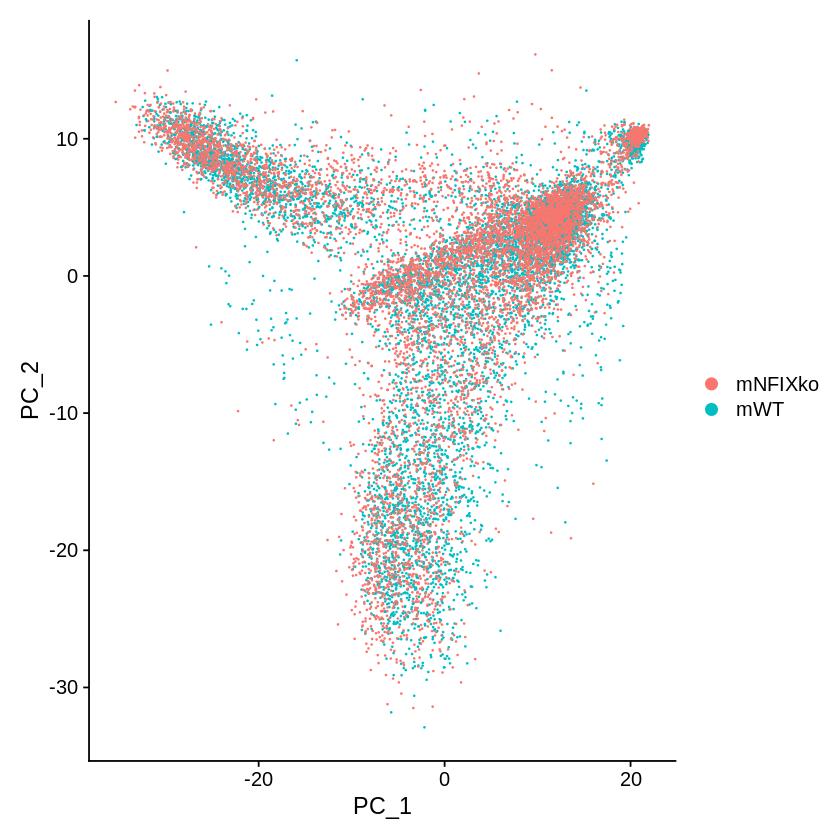

In [21]:
DimPlot(merged_obj)

In [22]:
DefaultAssay(merged_obj) <- 'ADT'
VariableFeatures(merged_obj) <- rownames(merged_obj[["ADT"]])
merged_obj <- NormalizeData(merged_obj, normalization.method = 'CLR', margin = 2) %>% 
  ScaleData() %>% RunPCA(reduction.name = 'apca')

Normalizing across cells

Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”
Warning message:
“Requested number is larger than the number of available items (8). Setting to 8.”
Warning message:
“Requested number is larger than the number of available items (8). Setting to 8.”
Warning message:
“Requested number is larger than the number of available items (8). Setting to 8.”
Warning message:
“Requested number is larger than the number of available items (8). Setting to 8.”
Warning message:
“Requested number is larger than the number of available items (8). Setting to 8.”
PC_ 1 
Positive:  CD48-TotalA, CD16-32-TotalA, CD71-TotalA, CD34-TotalA 
Negative:  CD150-TotalA, CD41-TotalA, Sca1-TotalA, CD105-TotalA 
PC_ 2 


In [29]:
merged_obj@reductions

$pca
A dimensional reduction object with key PC_ 
 Number of dimensions: 50 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$apca
A dimensional reduction object with key apca_ 
 Number of dimensions: 7 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: ADT 


In [30]:
DefaultAssay(merged_obj) <- 'ADT'
merged_obj <- FindMultiModalNeighbors(
  merged_obj, reduction.list = list("pca", "apca"), 
  dims.list = list(1:30, 1:7), modality.weight.name = "RNA.weight"
)

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Warning message in FindMultiModalNeighbors(merged_obj, reduction.list = list("pca", :
“The number of provided modality.weight.name is not equal to the number of modalities. RNA.weight ADT.weight are used to store the modality weights”
Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph



In [31]:
merged_obj <- RunUMAP(merged_obj, nn.name = "weighted.nn", reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")
merged_obj <- FindClusters(merged_obj, graph.name = "wsnn", algorithm = 3, resolution = 2, verbose = FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:38:16 UMAP embedding parameters a = 0.9922 b = 1.112

10:38:16 Commencing smooth kNN distance calibration using 1 thread

10:38:17 Initializing from normalized Laplacian + noise

10:38:17 Commencing optimization for 200 epochs, with 476070 positive edges

10:38:36 Optimization finished



In [71]:
?FindClusters

FindClusters {Seurat},R Documentation
object,An object
...,Arguments passed to other methods
modularity.fxn,Modularity function (1 = standard; 2 = alternative).
"initial.membership, node.sizes",Parameters to pass to the Python leidenalg function.
resolution,"Value of the resolution parameter, use a value above (below) 1.0 if you want to obtain a larger (smaller) number of communities."
method,"Method for running leiden (defaults to matrix which is fast for small datasets). Enable method = ""igraph"" to avoid casting large data to a dense matrix."
algorithm,Algorithm for modularity optimization (1 = original Louvain algorithm; 2 = Louvain algorithm with multilevel refinement; 3 = SLM algorithm; 4 = Leiden algorithm). Leiden requires the leidenalg python.
n.start,Number of random starts.
n.iter,Maximal number of iterations per random start.
random.seed,Seed of the random number generator.


In [76]:
merged_obj <- FindClusters(merged_obj, graph.name = "wsnn", algorithm = 3, resolution = 1, verbose = FALSE)
p1 <- DimPlot(merged_obj, reduction = 'wnn.umap', label = TRUE, repel = TRUE, label.size = 5) + NoLegend()


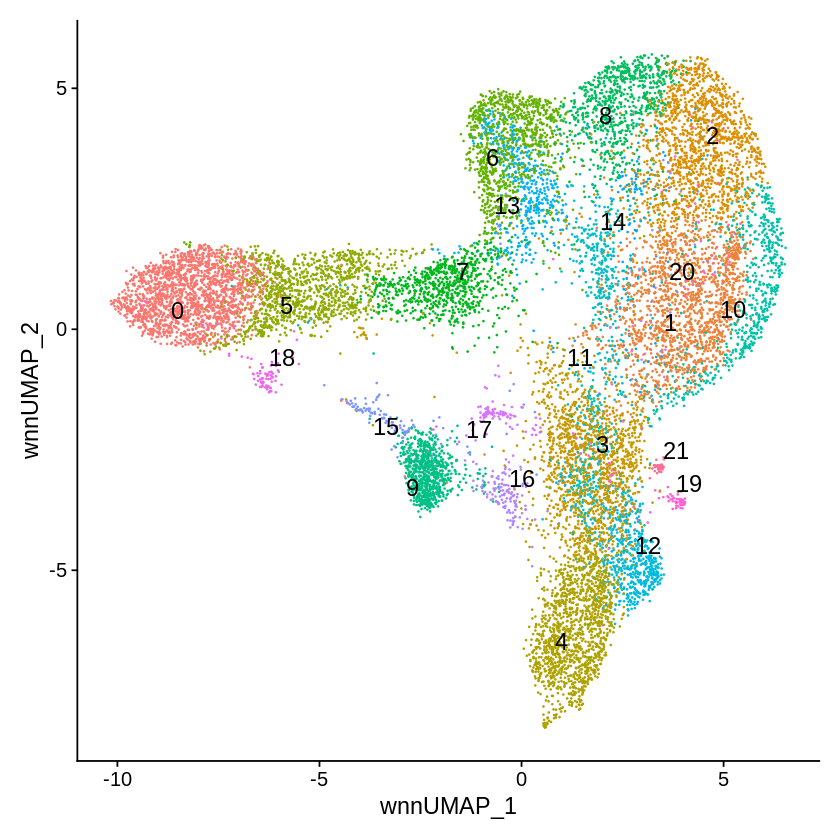

In [77]:
p1

In [78]:
library(scCATCH)


In [80]:
clu_markers_blood_Bone <- findmarkergenes(object = merged_obj,
                               species = 'Mouse',
                               cluster = 'All',
                               match_CellMatch = T,
                               cancer = NULL,
                               tissue = "Bone marrow",
                               cell_min_pct = 0.25,
                               logfc = 0.25,
                               pvalue = 0.05)

Note: the raw data matrix includes 15330 cells and 31053 genes. 

---Revising gene symbols according to NCBI Gene symbols (updated in June 19, 2020, https://www.ncbi.nlm.nih.gov/gene) and no matched genes and duplicated genes will be removed. 

Note: the new data matrix includes 15330 cells and 26989 genes. 

Note: there are 1595 potential marker genes in CellMatch database for Mouse on Bone marrow. 
Note: There are 22 clusters in Seurat object. 
Preparing to find potential marker genes for All cluster(s). 
Finding potential marker genes for cluster 0 
---Done--- 
Finding potential marker genes for cluster 1 
---Done--- 
Finding potential marker genes for cluster 2 
---Done--- 
Finding potential marker genes for cluster 3 
---Done--- 
Finding potential marker genes for cluster 4 
---Done--- 
Finding potential marker genes for cluster 5 
---Done--- 
Finding potential marker genes for cluster 6 
---Done--- 
Finding potential marker genes for cluster 7 
---Done--- 
Finding potential marke

In [81]:
clu_ann_BM <- scCATCH(object = clu_markers_blood_Bone$clu_markers,
                   species = 'Mouse',
                   cancer = NULL,
                   tissue = 'Bone marrow')

Note: there are 1595 potential marker genes in CellMatch database for Mouse on Bone marrow! 
Note: there are 57 cell types in CellMatch database for Mouse on Bone marrow! 
Beginning evidence-based scoring and annotation 
---Done--- 


In [87]:
clu_ann_BM

cluster,cluster_marker,cell_type,celltype_score,celltype_related_marker,PMID
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,"Alad, Blvrb, Car2, Chchd10, Cited4, Cpox, Glrx5, Phf10, Prdx2, Rhd, Smim1",Erythrocyte Progenitor Cell,0.75,"Car2, Blvrb, Prdx2, Glrx5",29775597
4,"Arhgdib, Cebpe, Clec4a2, Dstn, Elane, Fcnb, Gda, Gfi1, Gstm1, Hmgn2, Hp, Igsf6, Lta4h, Ms4a3, Msrb1, Pglyrp1, Prdx5, Prss57, Prtn3, Rflnb, Rgcc, S100a11, S100a8, S100a9, Serpinb1a, Srgn, Trem3, Wfdc21",Stage I Neutrophil,0.88,"Wfdc21, Cebpe, Clec4a2, Dstn, Fcnb, Gda, Hp, Igsf6, Pglyrp1, Prdx5, S100a11, S100a8, S100a9, Serpinb1a, Trem3, Rflnb",29915358
7,"Apoe, Clec4d","Macrophage, Neutrophil, Stem Cell","0.5, 0.5, 0.5","Clec4d, Apoe","29915358, 27225119, 29775597"
12,"Emb, F13a1, Glipr1, Ighm, Irf8, Ly86, Mgst1, Ms4a6c, Slpi, Tifab",Monocyte,0.77,"Ly86, Emb, F13a1, Glipr1, Ms4a6c, Slpi, Tifab","29915358, 29466336"
17,"Aldoc, C1qb, Ndrg2, Sparcl1",Hematopoietic Stem Cell,0.71,"Aldoc, Ndrg2",27225119
19,"Alox5, Asph, Cpa3, Fcer1a, Foxp1, Gata2, Gzmb, Ier3, Igf1r, Kit, Lmo4, Lpcat2, Papss2, Runx1, Slc18a2",Hematopoietic Stem Cell,0.89,"Kit, Asph, Cpa3, Gata2, Igf1r, Slc18a2","27009448, 27984734, 27225119, 28790449, 27365425, 28584094"
20,"Bst2, Cd274, Cd74, Cmpk2, Ddx60, F830016B08Rik, Gm12185, H2-Aa, H2-Eb1, H2-T22, H2-T23, Ifi204, Ifi27l2a, Ifit1, Ifit3, Ifit3b, Ifitm3, Irf7, Isg15, Ly6a, Ly6e, Oasl1, Oasl2, Rsad2, Rtp4, Samhd1, Serpina3f, Slfn5, Tgtp2, Trim30a, Trim30d, Ube2l6, Znfx1",Hematopoietic Stem Cell,0.95,"Ly6a, Cd74, F830016B08Rik, H2-Eb1, Samhd1, Znfx1, Ifit3b","27009448, 27984734, 28479188, 28790449, 27365425, 27225119, 28584094"
21,"Btg1, Ccl5, Ccr5, Cd2, Cd3d, Cd3g, Ets1, Gimap3, Gimap5, Gimap6, Gimap8, H2-K1, Id2, Il7r, Itgal, Itgax, Itgb2, Klrb1c, Lck, Ms4a4b, Nabp1, Ptprc, Rac2, S100a10, Selplg, Sh3bgrl3, Shisa5, Thy1, Traf1, Trbc2, Tyrobp",Mesenchymal Stem Cell,0.93,"Ptprc, Thy1","28537524, 28921810, 22781302, 22889498, 17939119, 28189639"


In [101]:
# clu_ann_BM$celltype_related_marker[[1]]
strsplit(clu_ann_BM$celltype_related_marker[[1]],", ")[[1]]

[1] "Car2"  "Blvrb" "Prdx2" "Glrx5"

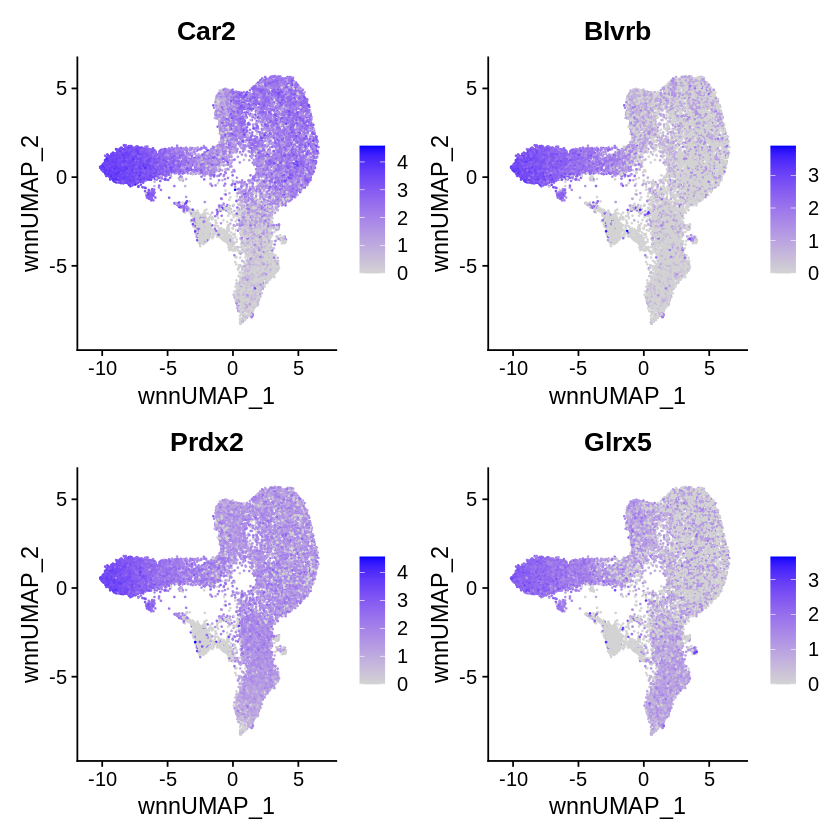

In [102]:
FeaturePlot(merged_obj, features =strsplit(clu_ann_BM$celltype_related_marker[[1]],", ")[[1]], reduction = 'wnn.umap')

Warning message:
“Could not find Sca1-TotalA in the default search locations, found in ADT assay instead”
Warning message:
“Could not find CD150-TotalA in the default search locations, found in ADT assay instead”
Warning message:
“Could not find CD48-TotalA in the default search locations, found in ADT assay instead”
Warning message:
“Could not find CD16-32-TotalA in the default search locations, found in ADT assay instead”
Warning message:
“Could not find CD105-TotalA in the default search locations, found in ADT assay instead”
Warning message:
“Could not find CD41-TotalA in the default search locations, found in ADT assay instead”
Warning message:
“Could not find CD71-TotalA in the default search locations, found in ADT assay instead”
Warning message:
“Could not find CD34-TotalA in the default search locations, found in ADT assay instead”


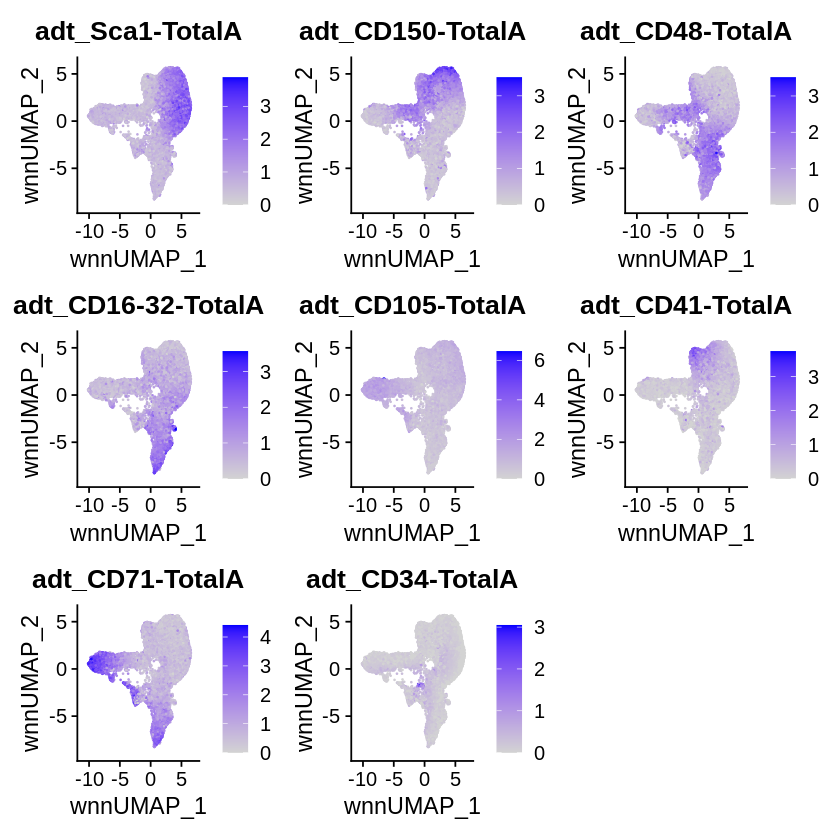

In [111]:
FeaturePlot(merged_obj, features = rownames(merged_obj@assays$ADT@meta.features), reduction = 'wnn.umap')

In [110]:
rownames(merged_obj@assays$ADT@meta.features)

[1] "Sca1-TotalA"    "CD150-TotalA"   "CD48-TotalA"    "CD16-32-TotalA"
[5] "CD105-TotalA"   "CD41-TotalA"    "CD71-TotalA"    "CD34-TotalA"

In [70]:
# merged_obj$orig.ident
cM <- confusionMatrix(paste0(merged_obj$seurat_clusters), paste0(merged_obj$orig.ident))
cM

ERROR: Error: `data` and `reference` should be factors with the same levels.


In [62]:
install.packages("e1071")


also installing the dependency ‘proxy’




In [69]:
paste0 ( Idents(merged_obj) )

[1] "13" "7"  "0"  "12" "7"  "8"  "6"  "4"  "4"  "15" "19" "4"  "2"  "4" 
   [15] "17" "4"  "0"  "4"  "13" "12" "11" "20" "0"  "20" "1"  "10" "16" "13"
   [29] "5"  "0"  "11" "2"  "13" "8"  "10" "4"  "8"  "1"  "16" "17" "24" "11"
   [43] "2"  "20" "0"  "0"  "8"  "0"  "15" "8"  "8"  "4"  "22" "10" "25" "10"
   [57] "1"  "11" "16" "12" "6"  "11" "10" "0"  "29" "12" "7"  "20" "12" "11"
   [71] "17" "17" "7"  "15" "12" "5"  "16" "10" "4"  "1"  "30" "10" "4"  "5" 
   [85] "9"  "3"  "2"  "0"  "5"  "12" "2"  "14" "10" "0"  "0"  "2"  "17" "8" 
   [99] "10" "8"  "0"  "12" "2"  "22" "11" "0"  "16" "6"  "15" "0"  "20" "2" 
  [113] "0"  "2"  "0"  "6"  "12" "3"  "21" "5"  "3"  "6"  "2"  "20" "5"  "9" 
  [127] "20" "10" "18" "23" "4"  "6"  "19" "4"  "5"  "4"  "9"  "18" "10" "11"
  [141] "11" "14" "6"  "6"  "0"  "9"  "26" "1"  "11" "7"  "9"  "0"  "14" "10"
  [155] "14" "14" "3"  "12" "4"  "5"  "20" "1"  "5"  "9"  "7"  "7"  "21" "4" 
  [169] "0"  "4"  "2"  "11" "7"  "5"  "8"  "12" "6"  "22" "6"  "20" "17" "3" 
  [183] "6"  "14" "2"  "9"  "10" "12" "23" "0"  "4"  "13" "12" "2"  "14" "8" 
  [197] "23" "18" "15" "7"  "0"  "0"  "3"  "1"  "13" "3"  "0"  "0"  "0"  "26"
  [211] "17" "4"  "30" "4"  "6"  "2"  "1"  "19" "1"  "5"  "5"  "15" "0"  "17"
  [225] "8"  "5"  "16" "5"  "28" "19" "3"  "12" "0"  "8"  "6"  "12" "1"  "1" 
  [239] "19" "8"  "9"  "6"  "0"  "1"  "0"  "0"  "0"  "10" "11" "2"  "15" "8" 
  [253] "0"  "0"  "14" "0"  "14" "1"  "25" "5"  "10" "8"  "2"  "5"  "3"  "10"
  [267] "16" "9"  "12" "0"  "4"  "1"  "14" "13" "9"  "3"  "9"  "9"  "10" "2" 
  [281] "16" "25" "9"  "9"  "8"  "6"  "21" "0"  "2"  "2"  "11" "15" "12" "9" 
  [295] "17" "13" "1"  "3"  "16" "13" "13" "1"  "3"  "2"  "8"  "2"  "0"  "18"
  [309] "9"  "5"  "8"  "3"  "8"  "1"  "8"  "18" "15" "7"  "8"  "20" "9"  "8" 
  [323] "9"  "11" "2"  "0"  "7"  "25" "23" "9"  "27" "13" "9"  "0"  "2"  "23"
  [337] "17" "5"  "5"  "9"  "3"  "23" "7"  "7"  "1"  "1"  "19" "5"  "7"  "17"
  [351] "1"  "10" "10" "7"  "12" "14" "15" "7"  "14" "2"  "12" "12" "17" "19"
  [365] "11" "7"  "2"  "8"  "5"  "3"  "18" "13" "21" "6"  "13" "1"  "2"  "10"
  [379] "15" "10" "1"  "0"  "4"  "15" "7"  "17" "15" "28" "5"  "11" "5"  "6" 
  [393] "29" "16" "0"  "14" "2"  "11" "12" "13" "3"  "4"  "0"  "0"  "4"  "3" 
  [407] "13" "3"  "5"  "2"  "20" "4"  "8"  "9"  "10" "9"  "14" "10" "7"  "7" 
  [421] "18" "3"  "12" "13" "17" "11" "18" "3"  "12" "3"  "13" "17" "10" "24"
  [435] "21" "0"  "19" "5"  "11" "15" "7"  "5"  "5"  "18" "3"  "6"  "4"  "10"
  [449] "9"  "7"  "17" "7"  "0"  "9"  "9"  "20" "0"  "0"  "7"  "2"  "18" "27"
  [463] "10" "12" "6"  "25" "4"  "4"  "8"  "5"  "0"  "15" "0"  "0"  "1"  "5" 
  [477] "4"  "7"  "0"  "16" "6"  "9"  "14" "9"  "13" "16" "5"  "2"  "0"  "15"
  [491] "10" "0"  "2"  "0"  "25" "2"  "23" "9"  "2"  "14" "5"  "11" "7"  "0" 
  [505] "11" "5"  "27" "5"  "7"  "15" "1"  "4"  "11" "0"  "8"  "15" "5"  "14"
  [519] "4"  "2"  "11" "7"  "27" "5"  "12" "14" "5"  "2"  "4"  "7"  "16" "16"
  [533] "10" "0"  "26" "6"  "11" "4"  "16" "17" "10" "8"  "19" "0"  "9"  "7" 
  [547] "2"  "8"  "7"  "12" "27" "9"  "12" "7"  "17" "10" "12" "8"  "3"  "21"
  [561] "1"  "5"  "4"  "10" "4"  "7"  "4"  "3"  "9"  "10" "9"  "6"  "17" "13"
  [575] "0"  "5"  "5"  "18" "5"  "7"  "1"  "10" "17" "11" "7"  "9"  "4"  "2" 
  [589] "6"  "19" "0"  "14" "0"  "18" "5"  "0"  "10" "2"  "13" "25" "1"  "11"
  [603] "11" "8"  "0"  "12" "3"  "3"  "19" "1"  "14" "9"  "0"  "15" "2"  "2" 
  [617] "13" "3"  "20" "13" "15" "21" "2"  "5"  "8"  "12" "5"  "9"  "9"  "11"
  [631] "7"  "14" "15" "4"  "22" "14" "12" "7"  "20" "0"  "15" "1"  "8"  "1" 
  [645] "4"  "19" "2"  "8"  "0"  "17" "23" "11" "18" "2"  "2"  "5"  "9"  "4" 
  [659] "12" "0"  "5"  "9"  "12" "3"  "23" "3"  "2"  "3"  "15" "12" "8"  "2" 
  [673] "13" "4"  "3"  "5"  "4"  "11" "14" "7"  "10" "16" "11" "5"  "10" "14"
  [687] "6"  "18" "5"  "14" "7"  "15" "9"  "25" "1"  "11" "23" "10" "0"  "2" 
  [701] "0"  "14" "11" "14" "2"  "6"  "2"  "23" "6"  "17" "11" "7"  "13" "10"
  [715] "19" "3"  "3"  "4"

In [66]:
paste0(merged_obj$seurat_clusters)

[1] "13" "7"  "0"  "12" "7"  "8"  "6"  "4"  "4"  "15" "19" "4"  "2"  "4" 
   [15] "17" "4"  "0"  "4"  "13" "12" "11" "20" "0"  "20" "1"  "10" "16" "13"
   [29] "5"  "0"  "11" "2"  "13" "8"  "10" "4"  "8"  "1"  "16" "17" "24" "11"
   [43] "2"  "20" "0"  "0"  "8"  "0"  "15" "8"  "8"  "4"  "22" "10" "25" "10"
   [57] "1"  "11" "16" "12" "6"  "11" "10" "0"  "29" "12" "7"  "20" "12" "11"
   [71] "17" "17" "7"  "15" "12" "5"  "16" "10" "4"  "1"  "30" "10" "4"  "5" 
   [85] "9"  "3"  "2"  "0"  "5"  "12" "2"  "14" "10" "0"  "0"  "2"  "17" "8" 
   [99] "10" "8"  "0"  "12" "2"  "22" "11" "0"  "16" "6"  "15" "0"  "20" "2" 
  [113] "0"  "2"  "0"  "6"  "12" "3"  "21" "5"  "3"  "6"  "2"  "20" "5"  "9" 
  [127] "20" "10" "18" "23" "4"  "6"  "19" "4"  "5"  "4"  "9"  "18" "10" "11"
  [141] "11" "14" "6"  "6"  "0"  "9"  "26" "1"  "11" "7"  "9"  "0"  "14" "10"
  [155] "14" "14" "3"  "12" "4"  "5"  "20" "1"  "5"  "9"  "7"  "7"  "21" "4" 
  [169] "0"  "4"  "2"  "11" "7"  "5"  "8"  "12" "6"  "22" "6"  "20" "17" "3" 
  [183] "6"  "14" "2"  "9"  "10" "12" "23" "0"  "4"  "13" "12" "2"  "14" "8" 
  [197] "23" "18" "15" "7"  "0"  "0"  "3"  "1"  "13" "3"  "0"  "0"  "0"  "26"
  [211] "17" "4"  "30" "4"  "6"  "2"  "1"  "19" "1"  "5"  "5"  "15" "0"  "17"
  [225] "8"  "5"  "16" "5"  "28" "19" "3"  "12" "0"  "8"  "6"  "12" "1"  "1" 
  [239] "19" "8"  "9"  "6"  "0"  "1"  "0"  "0"  "0"  "10" "11" "2"  "15" "8" 
  [253] "0"  "0"  "14" "0"  "14" "1"  "25" "5"  "10" "8"  "2"  "5"  "3"  "10"
  [267] "16" "9"  "12" "0"  "4"  "1"  "14" "13" "9"  "3"  "9"  "9"  "10" "2" 
  [281] "16" "25" "9"  "9"  "8"  "6"  "21" "0"  "2"  "2"  "11" "15" "12" "9" 
  [295] "17" "13" "1"  "3"  "16" "13" "13" "1"  "3"  "2"  "8"  "2"  "0"  "18"
  [309] "9"  "5"  "8"  "3"  "8"  "1"  "8"  "18" "15" "7"  "8"  "20" "9"  "8" 
  [323] "9"  "11" "2"  "0"  "7"  "25" "23" "9"  "27" "13" "9"  "0"  "2"  "23"
  [337] "17" "5"  "5"  "9"  "3"  "23" "7"  "7"  "1"  "1"  "19" "5"  "7"  "17"
  [351] "1"  "10" "10" "7"  "12" "14" "15" "7"  "14" "2"  "12" "12" "17" "19"
  [365] "11" "7"  "2"  "8"  "5"  "3"  "18" "13" "21" "6"  "13" "1"  "2"  "10"
  [379] "15" "10" "1"  "0"  "4"  "15" "7"  "17" "15" "28" "5"  "11" "5"  "6" 
  [393] "29" "16" "0"  "14" "2"  "11" "12" "13" "3"  "4"  "0"  "0"  "4"  "3" 
  [407] "13" "3"  "5"  "2"  "20" "4"  "8"  "9"  "10" "9"  "14" "10" "7"  "7" 
  [421] "18" "3"  "12" "13" "17" "11" "18" "3"  "12" "3"  "13" "17" "10" "24"
  [435] "21" "0"  "19" "5"  "11" "15" "7"  "5"  "5"  "18" "3"  "6"  "4"  "10"
  [449] "9"  "7"  "17" "7"  "0"  "9"  "9"  "20" "0"  "0"  "7"  "2"  "18" "27"
  [463] "10" "12" "6"  "25" "4"  "4"  "8"  "5"  "0"  "15" "0"  "0"  "1"  "5" 
  [477] "4"  "7"  "0"  "16" "6"  "9"  "14" "9"  "13" "16" "5"  "2"  "0"  "15"
  [491] "10" "0"  "2"  "0"  "25" "2"  "23" "9"  "2"  "14" "5"  "11" "7"  "0" 
  [505] "11" "5"  "27" "5"  "7"  "15" "1"  "4"  "11" "0"  "8"  "15" "5"  "14"
  [519] "4"  "2"  "11" "7"  "27" "5"  "12" "14" "5"  "2"  "4"  "7"  "16" "16"
  [533] "10" "0"  "26" "6"  "11" "4"  "16" "17" "10" "8"  "19" "0"  "9"  "7" 
  [547] "2"  "8"  "7"  "12" "27" "9"  "12" "7"  "17" "10" "12" "8"  "3"  "21"
  [561] "1"  "5"  "4"  "10" "4"  "7"  "4"  "3"  "9"  "10" "9"  "6"  "17" "13"
  [575] "0"  "5"  "5"  "18" "5"  "7"  "1"  "10" "17" "11" "7"  "9"  "4"  "2" 
  [589] "6"  "19" "0"  "14" "0"  "18" "5"  "0"  "10" "2"  "13" "25" "1"  "11"
  [603] "11" "8"  "0"  "12" "3"  "3"  "19" "1"  "14" "9"  "0"  "15" "2"  "2" 
  [617] "13" "3"  "20" "13" "15" "21" "2"  "5"  "8"  "12" "5"  "9"  "9"  "11"
  [631] "7"  "14" "15" "4"  "22" "14" "12" "7"  "20" "0"  "15" "1"  "8"  "1" 
  [645] "4"  "19" "2"  "8"  "0"  "17" "23" "11" "18" "2"  "2"  "5"  "9"  "4" 
  [659] "12" "0"  "5"  "9"  "12" "3"  "23" "3"  "2"  "3"  "15" "12" "8"  "2" 
  [673] "13" "4"  "3"  "5"  "4"  "11" "14" "7"  "10" "16" "11" "5"  "10" "14"
  [687] "6"  "18" "5"  "14" "7"  "15" "9"  "25" "1"  "11" "23" "10" "0"  "2" 
  [701] "0"  "14" "11" "14" "2"  "6"  "2"  "23" "6"  "17" "11" "7"  "13" "10"
  [715] "19" "3"  "3"  "4"

In [67]:
paste0(merged_obj$orig.ident)

[1] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
    [8] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [15] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [22] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [29] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [36] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [43] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [50] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [57] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [64] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [71] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [78] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [85] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [92] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
   [99] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [106] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [113] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [120] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [127] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [134] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [141] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [148] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [155] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [162] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [169] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [176] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [183] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [190] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [197] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [204] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [211] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [218] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [225] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [232] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [239] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [246] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [253] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [260] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [267] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [274] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [281] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [288] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [295] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [302] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [309] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [316] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [323] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [330] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [337] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [344] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [351] "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"     "mWT"    
  [358] "mWT"     "mWT"   

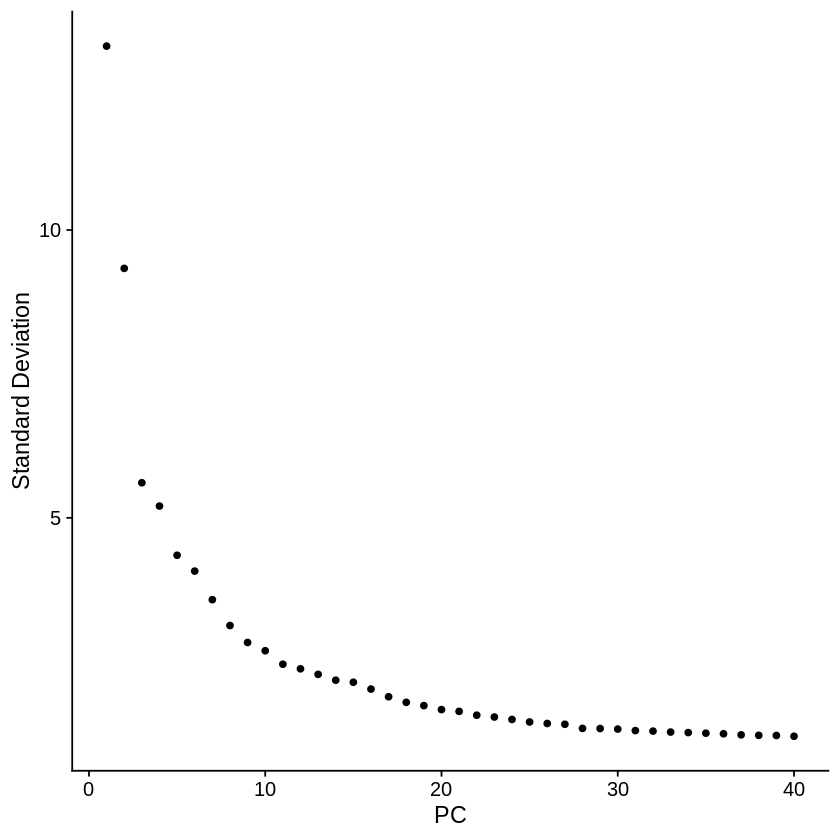

In [37]:
ElbowPlot(merged_obj,ndims =40)

Warning message:
“Removed 21000 rows containing missing values (geom_point).”


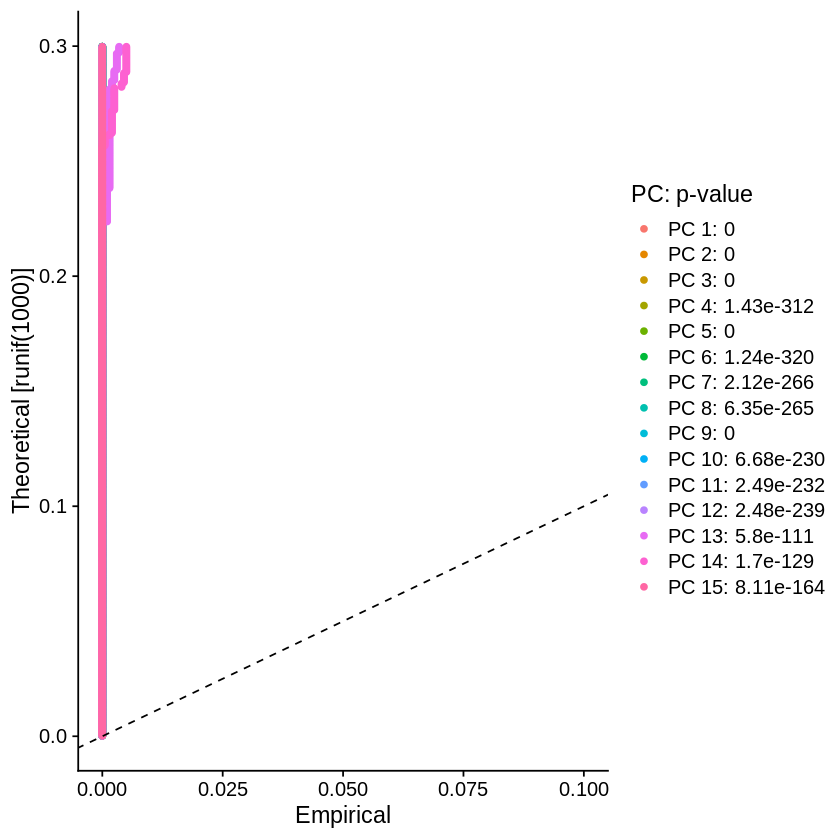

In [42]:
DefaultAssay(merged_obj) <- 'RNA'

merged_obj <- JackStraw(merged_obj, num.replicate = 100)
merged_obj <- ScoreJackStraw(merged_obj, dims = 1:20)
JackStrawPlot(merged_obj, dims = 1:15)


In [41]:
merged_obj

An object of class Seurat 
31061 features across 15330 samples within 2 assays 
Active assay: ADT (8 features, 8 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, apca, wnn.umap

In [9]:
subset(x = pbmc_small, features = c("PPBP","VDAC3"))

An object of class Seurat 
2 features across 80 samples within 1 assay 
Active assay: RNA (2 features, 2 variable features)
 2 dimensional reductions calculated: pca, tsne

In [8]:
VariableFeatures(object = pbmc_small)

[1] "PPBP"          "IGLL5"         "VDAC3"         "CD1C"         
 [5] "AKR1C3"        "PF4"           "MYL9"          "GNLY"         
 [9] "TREML1"        "CA2"           "SDPR"          "PGRMC1"       
[13] "S100A8"        "TUBB1"         "HLA-DQA1"      "PARVB"        
[17] "RUFY1"         "HLA-DPB1"      "RP11-290F20.3" "S100A9"